## 1. Problem Framing ✨

### The objective of this project is to build a binary classification model that predicts the likelihood of a telecom customer churning, using historical customer data, to support proactive retention strategies and reduce revenue loss.

## 2. Data Understanding 💡

#### Less Important Columns
1. CustomerID
2. Count
3. Churn Score
4. Churn Reason
5. Churn Value

#### EDA / Business Insight Only
1. Country
2. State
3. City
4. Zip Code
5. Lat Long
6. Latitude
7. Longitude
8. CLTV

#### Core Modeling Features
##### Demographics
1. Gender
2. Senior Citizen
3. Partner
4. Dependents

##### Account & Tenure
1. Tenure Months
2. Contract
3. Paperless Billing
4. Payment Method

##### Services
1. Phone Service
2. Multiple Lines
3. Internet Service
4. Online Security
5. Online Backup
6. Device Protection
7. Tech Support
8. Streaming TV
9. Streaming Movies

##### Financials
1. Monthly Charges
2. Total Charges (after validation & conversion)

#### Target
1. Churn Label

## 3. EDA 📊

In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Users\vchan\Downloads\Telco_customer_churn.xlsx")
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

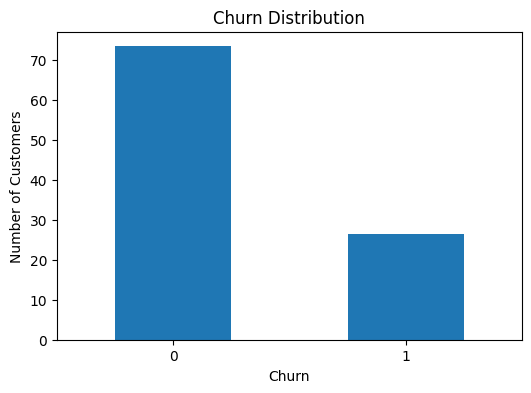

In [3]:
churn_value = df['Churn Value'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
churn_value.plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks(rotation=360)
plt.show()

## Target Variable Analysis
#### The target variable Churn is imbalanced, with approximately 23% of customers churning and 73% staying. This indicates that a naive model predicting non-churn for all customers would achieve high accuracy, making accuracy an unreliable metric for this problem. Therefore, churn prediction should focus on identifying churners rather than overall accuracy.

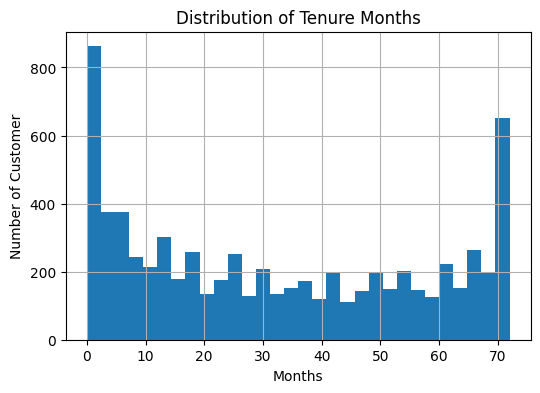

In [4]:
plt.figure(figsize=(6,4))
df['Tenure Months'].hist(bins=30)
plt.title('Distribution of Tenure Months')
plt.xlabel('Months')
plt.ylabel('Number of Customer')
plt.show()

### This indicates two dominant groups: new customers and long-term retained customers, with fewer customers in mid-tenure ranges.

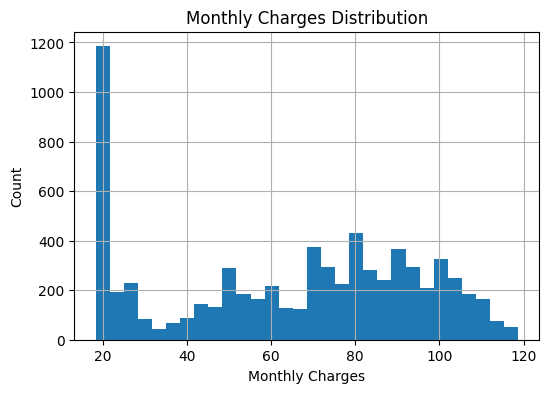

In [5]:
# Distribution plot
plt.figure(figsize=(6,4))
df['Monthly Charges'].hist(bins=30)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


### A high concentration of customers exists at lower monthly charges, while a broad spread is visible at higher charge ranges.

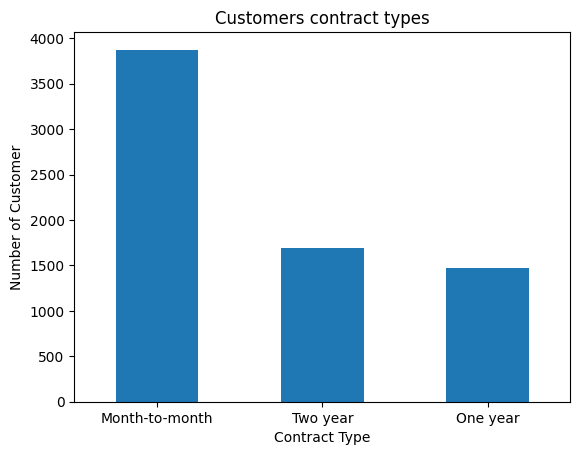

In [6]:
contract_type = df['Contract'].value_counts()
contract_type.plot(kind='bar')
plt.title('Customers contract types')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customer')
plt.xticks(rotation=360)
plt.show()

### Most customers are on month-to-month contracts, with fewer customers on one-year and two-year contracts.

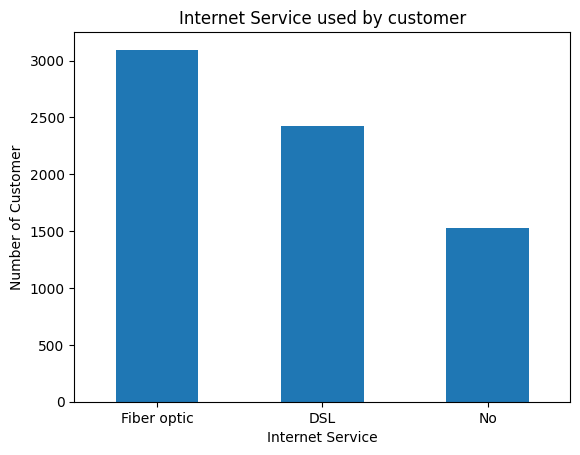

In [7]:
internet_service = df['Internet Service'].value_counts()
internet_service.plot(kind='bar')
plt.title('Internet Service used by customer')
plt.xlabel('Internet Service')
plt.xticks(rotation=360)
plt.ylabel('Number of Customer')
plt.show()

### Fiber optic is the most commonly used internet service, followed by DSL, while a smaller portion of customers have no internet service.

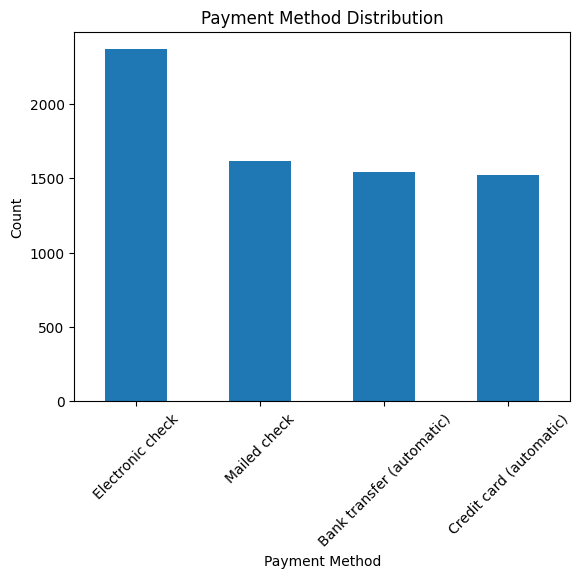

In [8]:
df['Payment Method'].value_counts().plot(kind='bar')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


### Electronic check is the most frequently used payment method, while automatic bank transfer and credit card payments are less common.

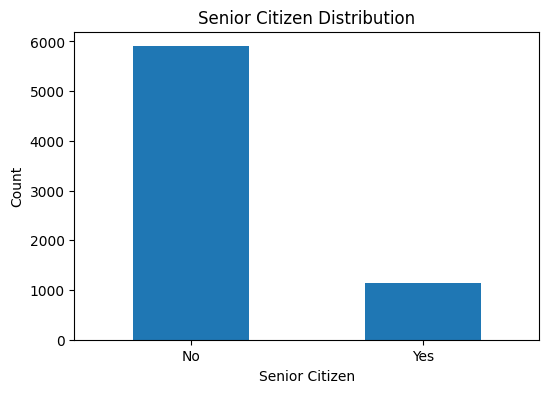

In [9]:
plt.figure(figsize=(6,4))
df['Senior Citizen'].value_counts().plot(kind='bar')
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen')
plt.xticks(rotation=360)
plt.ylabel('Count')
plt.show()


### The majority of customers are not senior citizens, with senior citizens forming a smaller segment of the customer base.

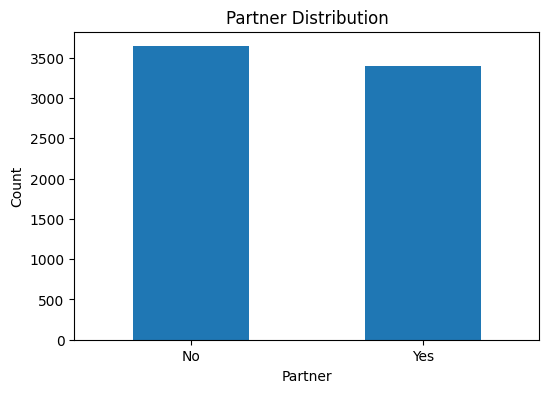

In [10]:
plt.figure(figsize=(6,4))
df['Partner'].value_counts().plot(kind='bar')
plt.title('Partner Distribution')
plt.xlabel('Partner')
plt.xticks(rotation=360)
plt.ylabel('Count')
plt.show()


### Customers are almost evenly split between having a partner and not having a partner.

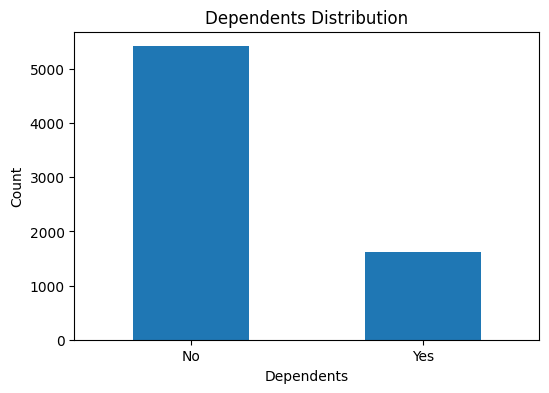

In [11]:
plt.figure(figsize=(6,4))
df['Dependents'].value_counts().plot(kind='bar')
plt.title('Dependents Distribution')
plt.xlabel('Dependents')
plt.xticks(rotation=360)
plt.ylabel('Count')
plt.show()

### Most customers do not have dependents, while a smaller portion have dependents.

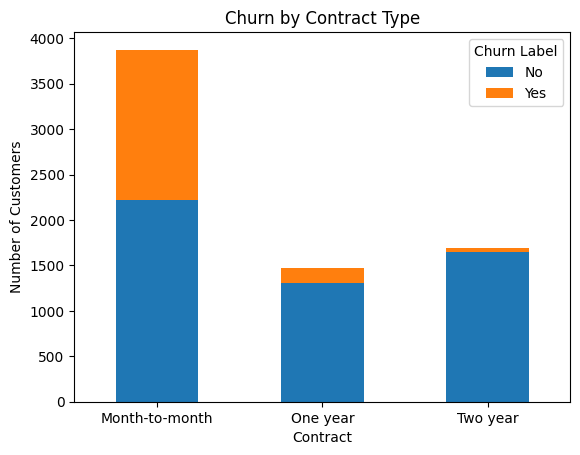

In [12]:
pd.crosstab(df['Contract'], df['Churn Label']).plot(kind='bar', stacked=True)
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.xticks(rotation=360)
plt.ylabel('Number of Customers')
plt.show()

### Customers on month-to-month contracts churn far more than those on one-year or two-year contracts.

<Figure size 600x400 with 0 Axes>

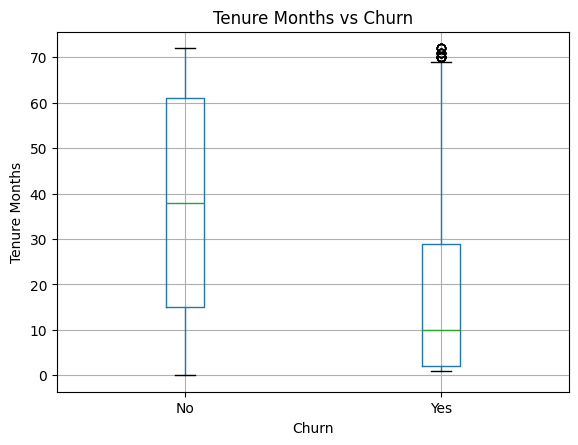

In [13]:
plt.figure(figsize=(6,4))
df.boxplot(column='Tenure Months', by='Churn Label')
plt.title('Tenure Months vs Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.xticks(rotation=360)
plt.ylabel('Tenure Months')
plt.show()

### Churned customers have much lower tenure, while long-tenure customers mostly stay.

<Figure size 600x400 with 0 Axes>

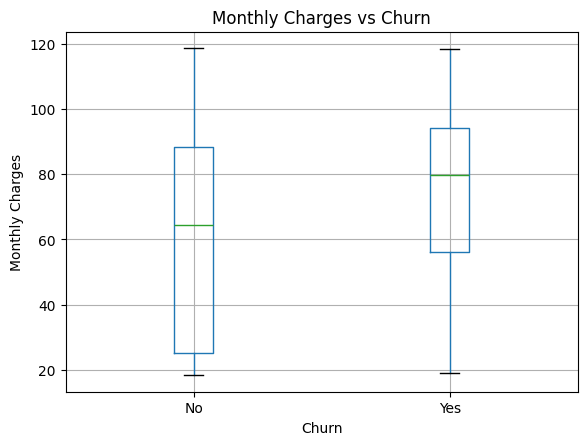

In [14]:
plt.figure(figsize=(6,4))
df.boxplot(column='Monthly Charges', by='Churn Label')
plt.title('Monthly Charges vs Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


### Customers who churn generally have higher monthly charges than those who do not.

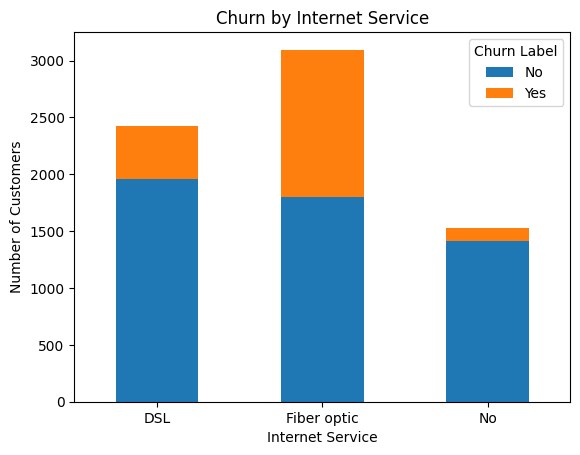

In [15]:
pd.crosstab(df['Internet Service'], df['Churn Label']).plot(kind='bar', stacked=True)
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.xticks(rotation=360)
plt.ylabel('Number of Customers')
plt.show()


### Fiber optic customers show the highest churn, while customers with no internet service churn the least

## 4. Data Cleaning 🫧

In [16]:
df = df.drop('Churn Value',axis=1) #Dropping Unncessary value

In [17]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors='coerce') #converting dtype ie  object -> int

In [18]:
df['Total Charges'].isna().sum()
df['Total Charges'] = df['Total Charges'].fillna(0)

In [19]:
df.info() #for checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## 5. Feature Engineering ⚙️ 

In [20]:
drop_cols = ['CustomerID','Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','Churn Score','CLTV','Churn Reason']
X = df.drop(columns=drop_cols + ['Churn Label'])
y = df['Churn Label']

#### Feature engineering focused on removing identifiers, leakage-prone variables, and high-cardinality location fields, while retaining customer demographics, service usage, contract details, tenure, and billing information relevant for churn prediction.

## 6. Train-Test-Split 🚂

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [22]:
y_train.value_counts(normalize=True) #sanity check

Churn Label
No     0.734647
Yes    0.265353
Name: proportion, dtype: float64

In [23]:
y_test.value_counts(normalize=True) #sanity check

Churn Label
No     0.734564
Yes    0.265436
Name: proportion, dtype: float64

## 7.  Baseline Model 🏠

In [24]:
y_train_encoded = y_train.map({'No': 0, 'Yes': 1}).values.ravel()
y_test_encoded = y_test.map({'No': 0, 'Yes': 1}).values.ravel()
#manual encoding

In [25]:
X_train_encoded = pd.get_dummies(X_train,drop_first=True)
X_test_encoded = pd.get_dummies(X_test,drop_first=True)

In [26]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_encoded,y_train_encoded)

C:\Users\vchan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
y_pred = model.predict(X_test_encoded)
y_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(1409,))

## 8. Model Evaluation 🎰

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [30]:
accuracy = accuracy_score(y_test_encoded,y_pred)
accuracy

0.8062455642299503

In [31]:
confusion = confusion_matrix(y_test_encoded,y_pred)
confusion

array([[920, 115],
       [158, 216]])

In [32]:
print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



## 9.  Decision Threshold and Risk 🚨

In [33]:
y_proba = model.predict_proba(X_test_encoded)[:, 1]
y_proba

array([0.0776716 , 0.67254594, 0.10667014, ..., 0.18433018, 0.00492371,
       0.0023194 ], shape=(1409,))

### Model is following this default rule
- If probability ≥ 0.50 → churn
- Else → no churn

In [34]:
import numpy as np
threshold = 0.3
y_pred_03 = (y_proba >= threshold).astype(int)

In [35]:
confusion_03 = confusion_matrix(y_test_encoded,y_pred_03)
confusion_03

array([[787, 248],
       [ 96, 278]])

In [36]:
threshold = 0.2
y_pred_02 = (y_proba >= threshold).astype(int)

confusion_matrix(y_test_encoded, y_pred_02)

array([[688, 347],
       [ 52, 322]])

### Why we chose a 0.3 threshold

Using the default threshold of 0.5 makes the model too strict, which means many customers who actually churn are not detected. When the threshold is lowered to 0.3, the model catches many more churned customers, which is more important for the business. Although this increases the number of customers flagged who would not have churned, the cost of contacting these customers is lower than the cost of losing real churners. Lowering the threshold further to 0.2 would flag too many customers and make retention efforts inefficient. Therefore, a threshold of 0.3 provides a practical balance between identifying churn risk and controlling unnecessary actions.

## 10. Finalize Model 🤖

- Model: Logistic Regression
- Problem: Binary classification (Customer Churn)
- Decision threshold: 0.3
- Purpose: Decision support for customer retention

#### Based on evaluation and threshold tuning:
1. Identifies a significantly larger portion of churners
2. Reduces false negatives (missed churn customers)
3. Trades off extra outreach for better retention coverage
4. Remains interpretable and explainable

- Baseline threshold (0.5): conservative, low recall
- Final threshold (0.3): higher recall, fewer missed churners
- Business trade-off: acceptable increase in false positives

In [38]:
import joblib
joblib.dump(model, "churn_logistic_model.pkl")
joblib.dump(X_train_encoded.columns, "model_columns.pkl")

['model_columns.pkl']